## NLP Course - HuggingFace
Topic: creating and using a model, tokenizers.
Notebook based on the NLP course from the Hugging Face.

https://huggingface.co/learn/nlp-course/en/chapter2/3?fw=pt;
https://huggingface.co/learn/nlp-course/en/chapter2/4?fw=pt



### Models

In [ ]:
from transformers import BertConfig, BertModel
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
config = BertConfig()
model = BertModel(config)

In [ ]:
print(config) # attributes used to build the model

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.40.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [ ]:
# random model initialization - should be trained
config = BertConfig()
model = BertModel(config)

In [ ]:
# loading pretrained model - initialized with all the weights of the checkpoint
model = BertModel.from_pretrained("bert-base-cased")

In [ ]:
# saving
model.save_pretrained("/etc") # config + model weights

In [ ]:
# inference
sequences = ["Hello!", "Cool.", "Nice!"]
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

In [ ]:
model_inputs = torch.tensor(encoded_sequences)
output = model(model_inputs)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 4.4496e-01,  4.8276e-01,  2.7797e-01,  ..., -5.4032e-02,
           3.9393e-01, -9.4770e-02],
         [ 2.4943e-01, -4.4093e-01,  8.1772e-01,  ..., -3.1917e-01,
           2.2992e-01, -4.1172e-02],
         [ 1.3668e-01,  2.2518e-01,  1.4502e-01,  ..., -4.6915e-02,
           2.8224e-01,  7.5566e-02],
         [ 1.1789e+00,  1.6738e-01, -1.8187e-01,  ...,  2.4671e-01,
           1.0441e+00, -6.1974e-03]],

        [[ 3.6436e-01,  3.2464e-02,  2.0258e-01,  ...,  6.0110e-02,
           3.2451e-01, -2.0996e-02],
         [ 7.1866e-01, -4.8725e-01,  5.1740e-01,  ..., -4.4012e-01,
           1.4553e-01, -3.7545e-02],
         [ 3.3223e-01, -2.3271e-01,  9.4876e-02,  ..., -2.5268e-01,
           3.2172e-01,  8.1076e-04],
         [ 1.2523e+00,  3.5754e-01, -5.1321e-02,  ..., -3.7840e-01,
           1.0526e+00, -5.6255e-01]],

        [[ 2.4042e-01,  1.4718e-01,  1.2110e-01,  ...,  7.6062e-02,
           3.3564e-01,  2

### Tokenizers
Translate text into data that can be processed by the model. Can be used for both tokenizing and de-tokenizing.
- Word-based (spaces or punctuation)
- Character-based
- ** Subword-based (wordpiece, unigram, byte-pair encoding)

In [ ]:
# words
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


In [ ]:
# characters
tokenized_text = list("Jim Henson was a puppeteer")
print(tokenized_text)

['J', 'i', 'm', ' ', 'H', 'e', 'n', 's', 'o', 'n', ' ', 'w', 'a', 's', ' ', 'a', ' ', 'p', 'u', 'p', 'p', 'e', 't', 'e', 'e', 'r']


In [ ]:
# subword
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased") # fetches and loads the bert tokenizer

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased") # automatically identifies that the model is bert and loads bert tokenizer

In [ ]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.save_pretrained("/etc")

('/etc/tokenizer_config.json',
 '/etc/special_tokens_map.json',
 '/etc/vocab.txt',
 '/etc/added_tokens.json',
 '/etc/tokenizer.json')

### Text -> numbers = encoding

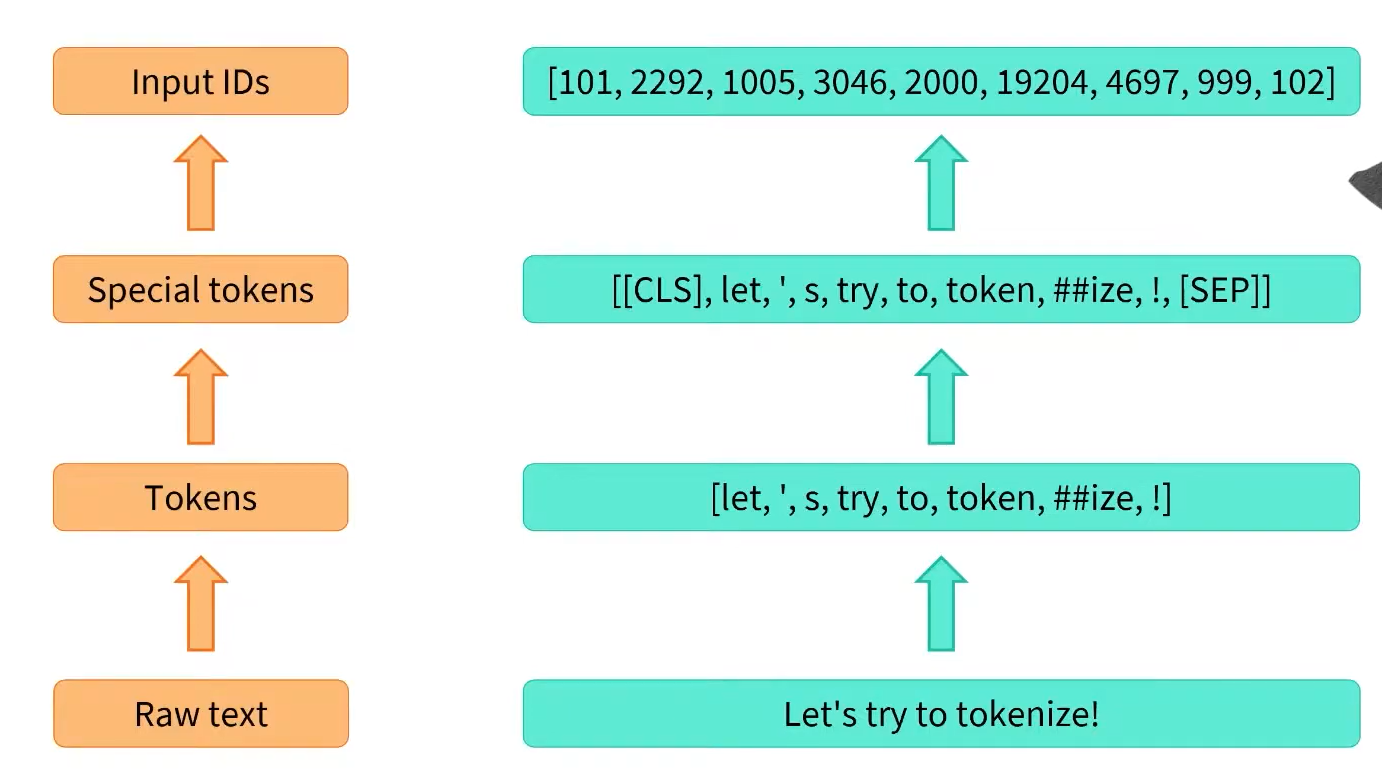

In [ ]:
sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


### Numbers -> text = decoding

In [ ]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple


### Multiple sequences


In [ ]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(ids)
# This line will fail. -> transformers expects multiple sequences input by default
model(input_ids)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

IndexError: too many indices for tensor of dimension 1

In [ ]:
tokenized_inputs = tokenizer(sequence, return_tensors="pt")
print(tokenized_inputs["input_ids"])

tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]])


In [ ]:
tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)

input_ids = torch.tensor([ids]) # extra dim
print("Input IDs:", input_ids)

output = model(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


In [ ]:
batched_ids = [ids, ids] # batch of two identical sequences
batched_input_ids = torch.tensor(batched_ids)
print("Input IDs:", batched_input_ids)

output = model(batched_input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012],
        [ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789],
        [-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


Padding: tensors should be rectangular.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits) # this has a diff value when batched (below) due to unmasking
print(model(torch.tensor(batched_ids)).logits)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


To get the same result when passing individual sentences of different lengths through the model or when passing a batch with the same sentences and padding applied, we need to tell those attention layers to ignore the padding tokens. This is done by using an attention mask.

### Attention mask
Tensors with same shape as the input IDs tensor, binary:
- 1: tokens should be attended to
- 0: tokens should not be attended to (i.e., they should be ignored by the attention layers of the model)

In [ ]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits) # masking -> issue above fixed

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


In [ ]:
# no batch, no padding
sequence1 = "I’ve been waiting for a HuggingFace course my whole life."
sequence2 = "I hate this so much!"
sequences=["I’ve been waiting for a HuggingFace course my whole life.","I hate this so much!"]

token1 = tokenizer.tokenize(sequence1)
token2 = tokenizer.tokenize(sequence2)

id1 = tokenizer.convert_tokens_to_ids(token1)
id2 = tokenizer.convert_tokens_to_ids(token2)

input_id1 = torch.tensor([id1])
input_id2 = torch.tensor([id2])

print(input_id1, input_id2)

output1 = model(input_id1)
output2 = model(input_id2)

print(output1, output2)

tensor([[ 1045,  1521,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]]) tensor([[1045, 5223, 2023, 2061, 2172,  999]])
SequenceClassifierOutput(loss=None, logits=tensor([[-2.5720,  2.6852]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None) SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1931, -2.6685]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [ ]:
# batch, padding
batched_ids = [
    [1045,  1521,  2310,  2042,  3403,  2005,  1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012],
    [1045, 5223, 2023, 2061, 2172, 999, tokenizer.pad_token_id, tokenizer.pad_token_id, tokenizer.pad_token_id, tokenizer.pad_token_id, tokenizer.pad_token_id, tokenizer.pad_token_id, tokenizer.pad_token_id, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits) # masking -> issue above fixed.

tensor([[-2.5720,  2.6852],
        [ 3.1931, -2.6685]], grad_fn=<AddmmBackward0>)


Longer sequences require truncating, or a model that can process them.

In [ ]:
max_sequence_length = 512
sequence = sequence[:max_sequence_length]

### Putting it all together

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)

In [ ]:
# single seq
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
model_inputs

{'input_ids': [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
# multiple seqs
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

model_inputs = tokenizer(sequences)
model_inputs

{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 2061, 2031, 1045, 999, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [ ]:
# padding
# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")

# Will pad the sequences up to the model max length ***
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")

# Will pad the sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)

In [ ]:
# truncating
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Will truncate the sequences that are longer than the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)

# Will truncate the sequences that are longer than the specified max length
model_inputs = tokenizer(sequences, max_length=8, truncation=True)
model_inputs

{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 102], [101, 2061, 2031, 1045, 999, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [ ]:
# returning pt, tf, np
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Returns PyTorch tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="pt")

# Returns TensorFlow tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="tf")

# Returns NumPy arrays
model_inputs = tokenizer(sequences, padding=True, return_tensors="np")

In [ ]:
# special tokens - beginning/end
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]


In [ ]:
# printing special tokens
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))

[CLS] i've been waiting for a huggingface course my whole life. [SEP]
i've been waiting for a huggingface course my whole life.


In [ ]:
# wrapping up
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)